# 真實資料

資料集連結:<br>
Heart Failure Prediction<br>
https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

統計比例

In [ ]:
import pandas as pd

# 读取 CSV 文件
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 统计 0 和 1 的数量
counts = data['DEATH_EVENT'].value_counts()

# 打印结果
print(counts)

## RandomForest

原始資料訓練

準確率： 0.75
分類報告：
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

混淆矩陣：
 [[33  2]
 [13 12]]


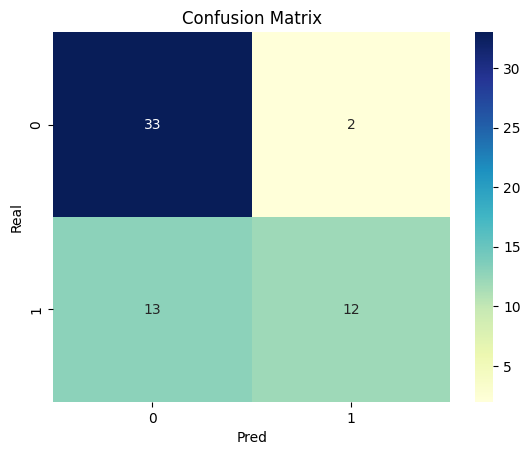

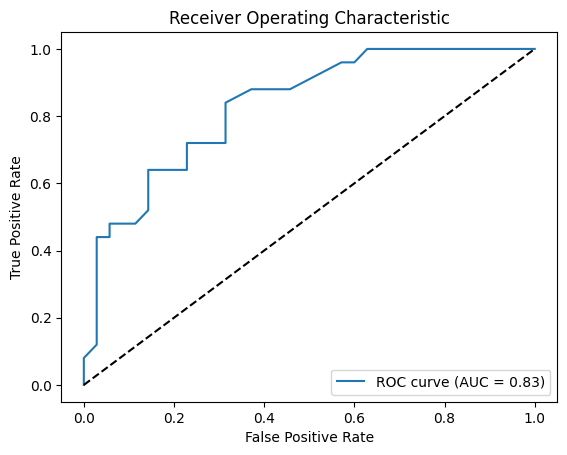

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料集
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 切分特徵和目標變數
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# 資料打亂
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立隨機森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 預測測試資料
y_pred = rf_model.predict(X_test)
y_pred_scores = rf_model.predict_proba(X_test)[:, 1]  # 使用 predict_proba 取得概率分數

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_scores)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_scores)

# 印出結果
print("準確率：", accuracy)
print("分類報告：\n", classification_report)
print("混淆矩陣：\n", confusion_mat)

# 可視化混淆矩陣
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
plt.xlabel('Pred')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

# 繪製 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 對角線
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

數據過採樣

準確率： 0.75
分類報告：
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

混淆矩陣：
 [[33  2]
 [13 12]]


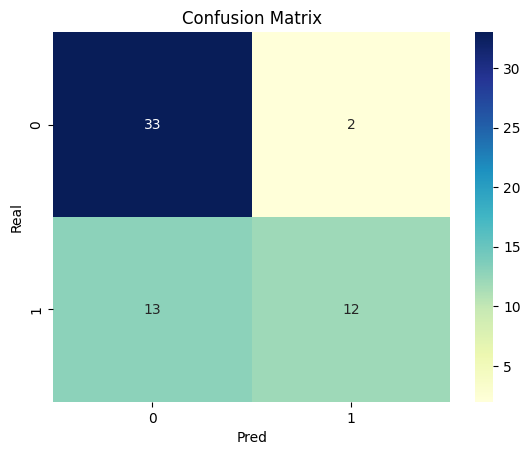

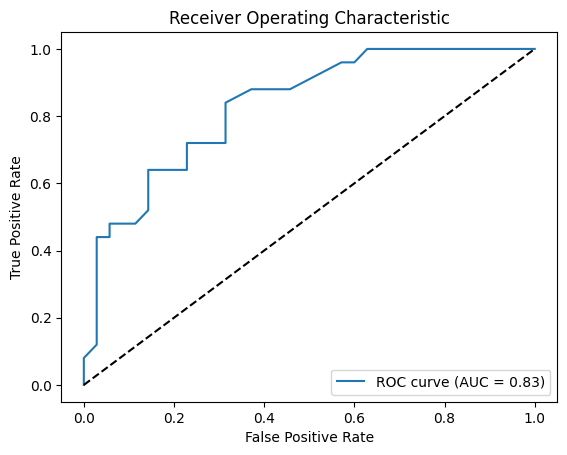

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler


# 讀取資料集
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 切分特徵和目標變數
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# 資料打亂
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#進行數據過採樣
oversampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# 建立隨機森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 預測測試資料
y_pred = rf_model.predict(X_test)
y_pred_scores = rf_model.predict_proba(X_test)[:, 1]  # 使用 predict_proba 取得概率分數

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_scores)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_scores)

# 印出結果
print("準確率：", accuracy)
print("分類報告：\n", classification_report)
print("混淆矩陣：\n", confusion_mat)

# 可視化混淆矩陣
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
plt.xlabel('Pred')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

# 繪製 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 對角線
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

數據降採樣

準確率： 0.75
分類報告：
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.73      0.64      0.68        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.74        60
weighted avg       0.75      0.75      0.75        60

混淆矩陣：
 [[29  6]
 [ 9 16]]


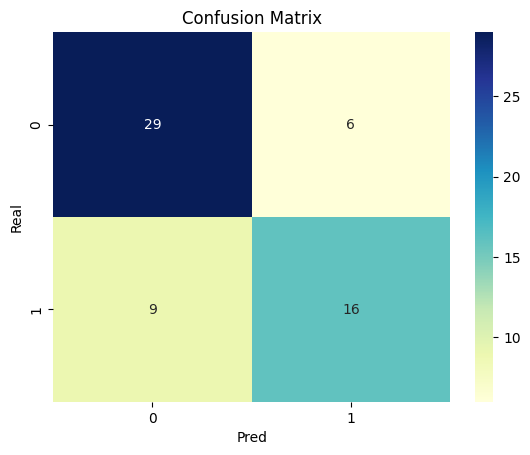

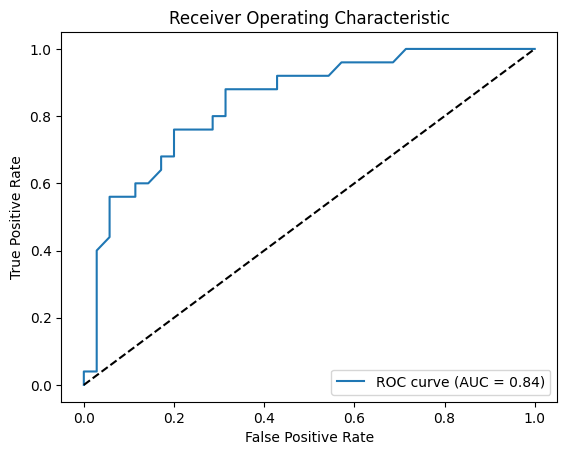

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

# 讀取資料集
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 切分特徵和目標變數
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# 資料打亂
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#進行數據降採樣
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# 建立隨機森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_undersampled, y_train_undersampled)

# 預測測試資料
y_pred = rf_model.predict(X_test)
y_pred_scores = rf_model.predict_proba(X_test)[:, 1]  # 使用 predict_proba 取得概率分數

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_scores)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_scores)

# 印出結果
print("準確率：", accuracy)
print("分類報告：\n", classification_report)
print("混淆矩陣：\n", confusion_mat)

# 可視化混淆矩陣
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
plt.xlabel('Pred')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

# 繪製 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 對角線
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

MinMax正規化

準確率： 0.75
分類報告：
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.73      0.64      0.68        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.74        60
weighted avg       0.75      0.75      0.75        60

混淆矩陣：
 [[29  6]
 [ 9 16]]


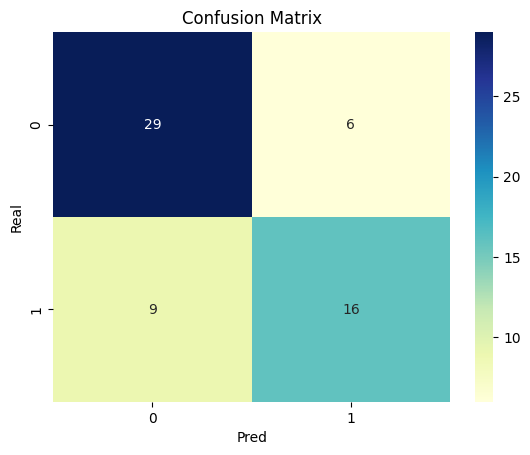

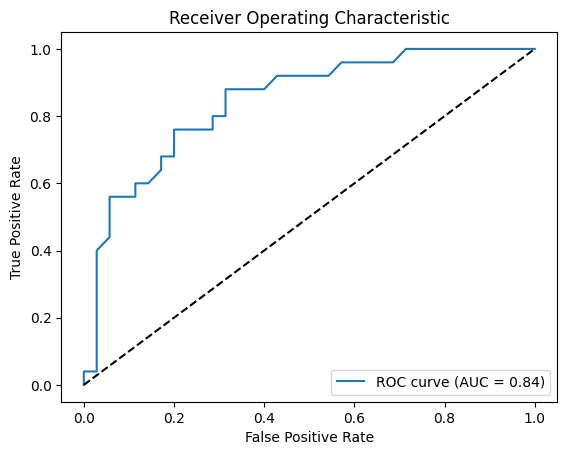

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

# 讀取資料集
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 切分特徵和目標變數
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# 資料打亂
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#進行數據降採樣
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# MinMax正规化
scaler = MinMaxScaler()
X_train_undersampled = scaler.fit_transform(X_train_undersampled)
X_test = scaler.transform(X_test)

# 建立隨機森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_undersampled, y_train_undersampled)

# 預測測試資料
y_pred = rf_model.predict(X_test)
y_pred_scores = rf_model.predict_proba(X_test)[:, 1]  # 使用 predict_proba 取得概率分數

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_scores)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_scores)

# 印出結果
print("準確率：", accuracy)
print("分類報告：\n", classification_report)
print("混淆矩陣：\n", confusion_mat)

# 可視化混淆矩陣
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
plt.xlabel('Pred')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

# 繪製 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 對角線
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

尋找重要特徵

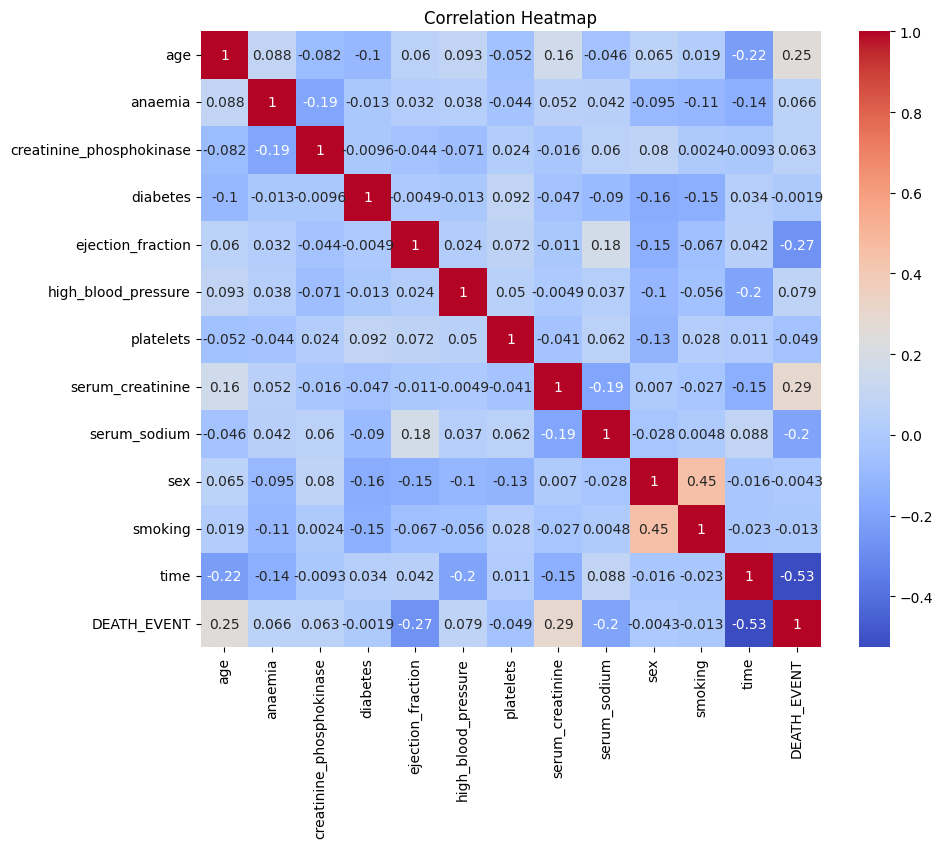

                     Feature  Importance
11                      time    0.344041
7           serum_creatinine    0.141477
4          ejection_fraction    0.119073
0                        age    0.091657
2   creatinine_phosphokinase    0.087620
6                  platelets    0.081932
8               serum_sodium    0.074636
3                   diabetes    0.012655
9                        sex    0.012531
10                   smoking    0.012523
1                    anaemia    0.011405
5        high_blood_pressure    0.010449
['time' 'serum_creatinine' 'ejection_fraction' 'age'
 'creatinine_phosphokinase' 'platelets' 'serum_sodium']


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 讀取資料集
df = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 計算變量之間的相關係數矩陣
corr_matrix = df.corr()

# 設定圖表大小
plt.figure(figsize=(10, 8))

# 使用Seaborn的heatmap函數繪製熱力圖
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# 添加標題
plt.title('Correlation Heatmap')

# 顯示圖表
plt.show()

# 切分特徵和目標變數
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# 建立隨機森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# 獲取特徵重要性
feature_importances = rf_model.feature_importances_

# 建立特徵重要性的DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 按照重要性排序
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# 印出特徵重要性排名
print(feature_importance_df)

# 選擇重要性較高的特徵
selected_features = feature_importance_df.loc[feature_importance_df['Importance'] > 0.03, 'Feature'].values

# 資料集僅包含選擇的特徵
X_selected = X[selected_features]

# 印出選擇的特徵
print(selected_features)


採用重要特徵

準確率： 0.75
分類報告：
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        35
           1       0.69      0.72      0.71        25

    accuracy                           0.75        60
   macro avg       0.74      0.75      0.74        60
weighted avg       0.75      0.75      0.75        60

混淆矩陣：
 [[27  8]
 [ 7 18]]


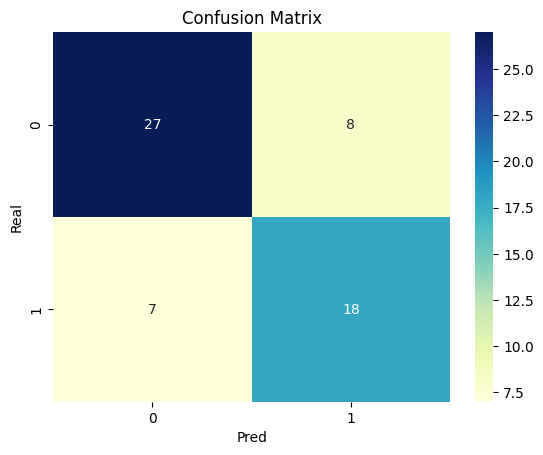

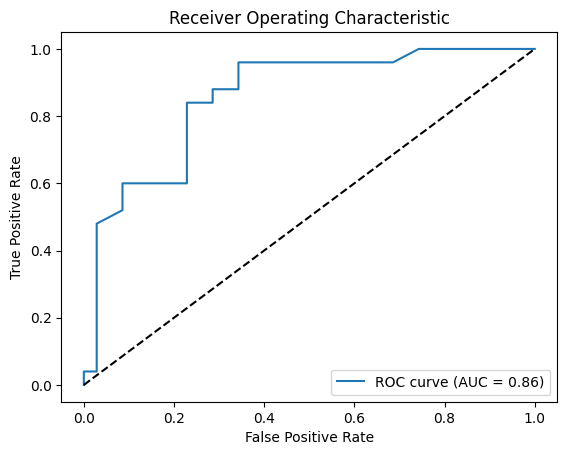

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

# 讀取資料集
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 選擇特徵
selected_features = ['time', 'serum_creatinine', 'ejection_fraction', 'age', 'creatinine_phosphokinase', 'platelets', 'serum_sodium']
X = data[selected_features]
y = data['DEATH_EVENT']

# 資料打亂
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#進行數據降採樣
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# MinMax正规化
scaler = MinMaxScaler()
X_train_undersampled = scaler.fit_transform(X_train_undersampled)
X_test = scaler.transform(X_test)

# 建立隨機森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_undersampled, y_train_undersampled)

# 預測測試資料
y_pred = rf_model.predict(X_test)
y_pred_scores = rf_model.predict_proba(X_test)[:, 1]  # 使用 predict_proba 取得概率分數

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_scores)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_scores)

# 印出結果
print("準確率：", accuracy)
print("分類報告：\n", classification_report)
print("混淆矩陣：\n", confusion_mat)

# 可視化混淆矩陣
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
plt.xlabel('Pred')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

# 繪製 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 對角線
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()